In [3]:
# import modules / libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn import model_selection
from sklearn import metrics


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

warnings.filterwarnings('ignore')

In [5]:
# Bank_Person_Loan_Modelling
df = pd.read_csv("Bank_Personal_Loan.csv") # Memory Usage : 547.0 KB
print(f'The shape of the dataset : {df.shape} \n') # data shape

# information of data
df.info()
print()

# columns
print(df.shape[1])
print(df.columns)

# random 5 records
df.iloc[np.random.randint(0,df.shape[0],5)]

The shape of the dataset : (5000, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB

14
Index(['ID',

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4357,4358,39,14,141,93302,4,6.3,1,0,1,1,1,1,1
2779,2780,59,35,168,95521,4,4.1,2,0,1,0,0,1,0
3860,3861,31,6,64,92121,2,0.1,1,0,0,0,0,1,1
1635,1636,49,24,70,91330,1,2.9,1,0,0,0,0,0,0
2851,2852,61,36,81,95449,3,1.8,2,0,0,0,0,1,0


In [6]:
#========================== Feature Description (14) ===========================#
'''
    - ID                    Customer ID
    - Age                   Customer's age in completed years
    - Experience            years of professional experience
    - Income                Annual income of the customer ($000)
    - ZIPCode               Home Address ZIP code.
    - Family                Family size of the customer
    - CCAvg	                Avg. spending on credit cards per month ($000)
    - Education	            Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
    - Mortgage	            Value of house mortgage if any. ($000)
    - Personal Loan	        Did this customer accept the personal loan offered in the last campaign?
    - Securities Account	Does the customer have a securities account with the bank?
    - CD Account	        Does the customer have a certificate of deposit (CD) account with the bank?
    - Online	            Does the customer use internet banking facilities?
    - CreditCard	        Does the customer use a credit card issued by UniversalBank?
'''
#=============================================================================================================#
# Scenario
'''
A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success.
'''

# Task
'''
The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. 
This will increase the success ratio while at the same time reduce the cost of the campaign.
'''

# Objective
'''
Build a logistic model to identify the potential customers
'''

#=========================== first impression on the dataset ===============================#
# Unique rows in each feature | every feature is non-unique 
# # df[i].is_unique
'''
    - ID                   : 5000
    - Age                  : 45
    - Experience           : 47
    - Income               : 162
    - ZIP Code             : 467
    - Family               : 4
    - CCAvg                : 108
    - Education            : 3
    - Mortgage             : 347
    - Personal Loan        : 2
    - Securities Account   : 2
    - CD Account           : 2
    - Online               : 2
    - CreditCard           : 2
'''

# Primary Key (1)
'''
    - ID (1-5000)
'''

# Predicted_variable (1)
'''
    - Personal Loan (Yes=1, No=0)
'''

# Numerical (5)
Num = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
'''
    - Age
    - Experience
    - Income
    - CCAvg
    - Mortgage
    
# CCAvg is in Float64
# remaining are in Int64
'''

# Categorical (7)
Cat = ['ZIP Code','Family','Education','Securities Account','CD Account','Online','CreditCard']
'''
    - ZIP Code
    - Family
    - Education
    - Securities Account
    - CD Account
    - Online
    - CreditCard
'''
#============Measurements=============#
# Nominal: the data can only be categorized.
# Ordinal: the data can be categorized and ranked.
# Interval: the data can be categorized and ranked, and evenly spaced.
# Ratio: the data can be categorized, ranked, evenly spaced and has a natural zero.
'''
# binary (5)
    - Personal Loan
    - Securities Account
    - CD Account
    - Online 
    - Credit Card

# nominal (1)
    - Zip Code

# ordinal (3)
    - ID
    - Education
    - Family

# interval (5)
    - Age
    - Experience
    - Income
    - CCAvg
    - Mortgage
'''

# Descriptive Statistics
'''             
# Age (in years)
	- There are 45 distinct records (1%)
	- the range is 23 - 67

# Experience (in years)	
	- There are 44 distinct records (1%)
	- the range is 0 - 43

# Income (in K/year)
	- There are 162 distinct records (3%)
	- The range is 8 - 224

# Income Categorical
	- There are 3 distinct records (0-50, 51-100, 100+)
	- The category for 0 - 50 is 1914
	- The category for 51-100 is 1874
	- The category for 100+ is 1212

# Zip code
	- There are 467 distinct records (9%)

# Family members
	- There are 4 distinct records (1, 2, 3, 4)
	- There are 18 blank records found & replaced by 2
    - Around 29% of the customer’s family size is 1.

# CCAvg
	- There are 108 distinct records (2%)

# Education
	- There are 3 distinct records (Graduate, Undergraduate, Professional)
    - 42% of the candidates are graduated, while 30% are professional and 28% are Undergraduate.

# Mortgage
	- There are 347 distinct records (7%)

# Personal Loan
	- There are 4520 non-active(No) personal loan customers (90%)
	- There are 480 active personal(Yes) loan customers (10%)

# Securities Account
	- There are 4478 non-active(No) Securitites Account customers (90%)
	- There are 522 active(Yes) Securities Account customers (10%)

# CD Account
	- There are 4698 non-active(No) Securitites Account customers (93.96%)
	- There are 302 active(Yes) Securities Account customers (6.04%)
    - 94% of the customer doesn’t have a certificate of deposit (CD) account with the bank.
	
# Online
	- There are 2016 non-active(No) Securitites Account customers (40%)
	- There are 2984 active(Yes) Securities Account customers (60%)

# CreditCard 
	- There are 3530 non-active(No) Securitites Account customers (71%)
	- There are 1470 active(Yes) Securities Account customers (29%)

'''

# Feature Engineer (1)
'''
    - Income_Category (2)                           : <50 | >=50
    - Income(in Annual) | CCAvg(in month)           : 1.Convert Income into monthly(/12) | 2.Convert CCAvg into annual(*12)
'''

# Data Cleaning
'''
    - Experience    : There are negative number (52) | which can be controlled by abs function
    - ID, Zip Code, Experience  : Are Mean't to be dropped (it would bias the model prediction or insignificant)

'''

# Missing Value Detection (Already Done)
'''
    - Nulls not found, Data is clean and reliable to count on # df.isna().sum() or df.apply(lambda x: x.count() == df.shape[0])
'''

# Duplicates
'''
    - There are no duplicates rows # df.duplicated().sum()
'''

# One_Hot_Encoding (Already Done)
'''
Convertable to Numerical variable
    - Education (Graduate=1, Undergraduate=0, Professional=-1)
    - Personal Loan (Yes=1, No=0)
    - Securities Account (Yes=1, No=0)
    - TD Account (Yes=1, No=0)
    - Online (Yes=1, No=0)
    - CreditCard (Yes=1, No=0)
'''

# Insights
"""
    - Personal Loan is highly correlated with Income, average spending on Credit cards, mortgage 
    - if the customer has a certificate of deposit (CD) account with the bank.

    - Experience is highly correlated with Age (ρ = 0.994214857)

    - Age and experience have strong positive relationship
    - Age and income have no linear relationship
    - Age and experience have no linear relationship

    - Income and CCAvg have strong positive relationship

    - CD Account has somewhat relationship with Credit Card, Income, CCAvg, Securities Account, Online

    - 94% of the customer doesn’t have a certificate of deposit (CD) account with the bank.
    - Around 71% of the customer doesn’t use a credit card issued by UniversalBank.
    - Around 60% of customers use internet banking facilities.
    - Around 90% of the customer doesn’t accept the personal loan offered in the last campaign.
    - Around 90% of the customer doesn’t have a securities account with the bank.

    - The mean age of the customers is 45 with standard deviation of 11.5. Also, we had estimated the average age in hypothesis testing between 30–50. The curve is slightly negatively skewed (Skewness = -0.02934068151) hence the curve is fairly symmetrical
    - The mean of Avg. spending on credit cards per month is 1.93 with standard deviation of 1.75. The curve is highly positive skewed (Skewness = 1.598443337)
    - The mean annual income of the customer is 73.77 with standard deviation of 46. The curve is moderately positive skewed (Skewness = 0.8413386073)
    - The mean value of house mortgage is 56.5 with standard deviation of 101.71. The curve is highly positive skewed (Skewness = 2.104002319) and there are a lot of outlier’s present (Kurtosis = 4.756796669)

    - Personal Loan has somewhat relationship with Income(strong), Education, CCAvg, CD Account, Mortgage

    - Mortgage has somewhat correlated with Income
    - Income influences CCAvg, Personal Loan, CD Account, Mortgage

    # relationship with predictor variable(personal_loan(y))
    - There is high chance of probability that customer is availing personal loan with greater than 80 or 90 Income
    - There is high chance of probability that customer is literate will avail personal loan
    - There is high chance of probability that customer will avail personal loan whether he/she are less than 30 of there experience
    - Family with low member can have low chance of probability compare with high members in an family can avail with higher probability of chance
    - above two features family, experience has low chance of probability in availing personal loan
    - there is high chance of probability of availing personal loan having no Credit Card
    - there is high chance of probability of availing personal loan having no Securities Account
    - there is high chance of probability of availing personal loan having no CD Account
    - There is higher chance of probability in availing personal loan by having both CreditCard with CD Account compare with not having both
    - There is higher chance of probability in availing personal loan by having both Securities Account with CD Account compare with not having both
"""
print('Analysis')

"""
Basic Assumptions
- Age is dependent on Personal Loan
- Experience is dependent on Personal Loan
- Income is dependent on Personal Loan
- Family is dependent on Personal Loan
- Education is dependent on Personal Loan
- CCAvg is dependent on Personal Loan
- Mortgage is dependent on Personal Loan
- Securtities Account is dependent on Personal Loan
- CD Account is dependent on Personal Loan
- Online is dependent on Personal Loan
- CreditCard is dependent on Personal Loan

Hypothesis Testing
- high salaries are less feasible to buy personal loans while customers with medium or low salaries are more feasible for buying personal loans.
- More the number of earning family members, less probability of buying personal loans.
- Customers with probably the age of 30–50 will buy personal loans.
- The customer is a graduate or under-graduate can affect the buying probability, people who are graduated or Advanced Professionals are more viable to buy personal loans from a bank rather than people who are under-graduated.
"""
df.iloc[np.random.randint(0,df.shape[0],5)]

Analysis


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2186,2187,26,2,92,96001,2,0.2,1,0,0,0,0,1,0
4592,4593,43,18,53,92115,3,0.8,3,154,0,0,0,0,0
2392,2393,44,20,138,94143,2,3.3,1,0,0,0,0,0,1
3996,3997,50,24,11,94501,4,0.6,3,0,0,0,0,0,1
413,414,32,7,42,92407,3,2.3,1,0,0,0,0,1,0


In [6]:
# Descriptive Statistics
Mean = df[Num].mean()
Median = df[Num].median()
Mode = df.mode()
Variance = df[Num].var()
Std_Dev = df[Num].std()
Coef_Var = Std_Dev[Num] / Mean[Num]
Minimum = df[Num].min()
Maximum = df[Num].max()
Range = Maximum[Num] - Minimum[Num]
Q1 = df[Num].quantile(0.25)
Q2 = df[Num].quantile(0.50)
Q3 = df[Num].quantile(0.75)
IQR = Q3[Num] - Q1[Num]
Adjusted_Q1 = Q1 - 1.5*IQR
Adjusted_Q3 = Q3 + 1.5*IQR
Outliers = df[(df[Num].apply(zscore) < -3.0) | (df[Num].apply(zscore) > 3.0)
              ], df[(df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))]  # more accurate in iqr
Skew = df.skew(), np.array(list(map(lambda x: (
    x[0]-x[1])/x[2], zip(Mean, Variance, Std_Dev))))  # skew is accurate
Kurtosis = df[Num].kurtosis()
Sum = df[Num].sum()
Count = df[Num].count()
Missing = (df.isna().sum()) + (df[df == '?'].agg('count'))

# Skewness
Left_Skewed = pd.Series(dict(list(Skew[0][Skew[0] < 0].items())))
Right_Skewed = pd.Series(dict(list(Skew[0][Skew[0] > 0].items())))
Symmetric = pd.Series(dict(list(Skew[0][np.round(Skew[0]) == 0].items())))

# Cov, Corr Matrix
Covariance = df.cov()
Correlation = df.corr()

# Normality of the data # mean = 0, std = 1
Normal_dist = df.apply(zscore)
P68 = Normal_dist[(Normal_dist[Num] > (Normal_dist[Num].mean()-1*Normal_dist[Num].std()))
                       & (Normal_dist[Num] < (Normal_dist[Num].mean()+1*Normal_dist[Num].std()))]  # one standard_deviation away from the mean (x-s, x+s)
P95 = Normal_dist[(Normal_dist[Num] > (Normal_dist[Num].mean()-2*Normal_dist[Num].std()))
                       & (Normal_dist[Num] < (Normal_dist[Num].mean()+2*Normal_dist[Num].std()))]  # two standard_deviation away from the mean (x-2*s, x+2*s)
P99 = Normal_dist[(Normal_dist[Num] > (Normal_dist[Num].mean()-3*Normal_dist[Num].std()))
                       & (Normal_dist[Num] < (Normal_dist[Num].mean()+3*Normal_dist[Num].std()))]  # three standard_deviation away from the mean (x-3*s, x+3*s)

# VIF
VIF = pd.Series([variance_inflation_factor(df.values, i) for i in range(df.shape[1])], index=df.columns)


# representation
Mean
Median
Mode.loc[0]
Variance
Std_Dev
Coef_Var
Minimum
Maximum
Range
Q1
Q2
Q3
IQR
Adjusted_Q1
Adjusted_Q3
pd.Series(data=[len(Outliers[1][i].dropna().unique()) for i in Num], index=Num)
Skew[0]
Kurtosis
Sum
Count
Missing
Left_Skewed
Right_Skewed
Symmetric
Covariance
Correlation
VIF

# Descriptive Statistics
Desc_Stats = pd.DataFrame(data={'Mean': Mean, 
                                'Median': Median, 
                                'Mode': Mode.loc[0], 
                                'Variance': Variance, 
                                'Std': Std_Dev, 
                                'Coef_Var': Coef_Var, 
                                'Min': Minimum, 
                                'Max': Maximum, 
                                'Range': Range, 
                                'Q1': Q1, 
                                'Q2': Q2, 
                                'Q3': Q3, 
                                'IQR': IQR,
                                'Adjusted_Q1': Adjusted_Q1, 
                                'Adjusted_Q3': Adjusted_Q3, 
                                'Outliers': pd.Series(data=[len(Outliers[1][i].dropna().unique()) for i in Num], index=Num), 
                                'Skewness': Skew[0], 
                                'Kurtosis': Kurtosis, 
                                'Sum': Sum, 
                                'Count': Count, 
                                'Missing': Missing,
                                'Left_Skewed': Left_Skewed,
                                'Right_Skewed': Right_Skewed,
                                'Symmetric':Symmetric,
                                'VIF': VIF
                                }).T
Desc_Stats[df.columns]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Mean,NaN,45.338400,20.104600,73.774200,NaN,NaN,1.937938,NaN,56.498800,NaN,NaN,NaN,NaN,NaN
Median,NaN,45.000000,20.000000,64.000000,NaN,NaN,1.500000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
Mode,1.000000,35.000000,32.000000,44.000000,94720.000000,1.000000,0.300000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
Variance,NaN,131.404166,131.513962,2119.104235,NaN,NaN,3.054312,NaN,10345.697538,NaN,NaN,NaN,NaN,NaN
Std,NaN,11.463166,11.467954,46.033729,NaN,NaN,1.747659,NaN,101.713802,NaN,NaN,NaN,NaN,NaN
Coef_Var,NaN,0.252836,0.570414,0.623981,NaN,NaN,0.901814,NaN,1.800283,NaN,NaN,NaN,NaN,NaN
Min,NaN,23.000000,-3.000000,8.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
Max,NaN,67.000000,43.000000,224.000000,NaN,NaN,10.000000,NaN,635.000000,NaN,NaN,NaN,NaN,NaN
Range,NaN,44.000000,46.000000,216.000000,NaN,NaN,10.000000,NaN,635.000000,NaN,NaN,NaN,NaN,NaN
Q1,NaN,35.000000,10.000000,39.000000,NaN,NaN,0.700000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


### Questions
1. Read the column description and ensure you understand each attribute well 
2. Study the data distribution in each attribute, share your findings. (2 points)
3. Get the target column distribution. Your comments
4. Split the data into training and test set in the ratio of 60: 40 respectively
5. Use different classification models(Logistic, KNN, Decision Tree, Random Forest) to predict the likelihood of a liability customer buying personal loans(10 points)
6. Print the confusion matrix for all the above models(4 points)
7. Give your reasoning on which is the best model in this case and why it performs better? (4 points)

### Models
- Logistic Model
- KNN
- Decision Tree
- Random Forest
- Confusion Matrix


No. of Availing Personal Loans : 480 | 9.6%
No. of Not Availing Personal Loans : 4520 | 90.4%


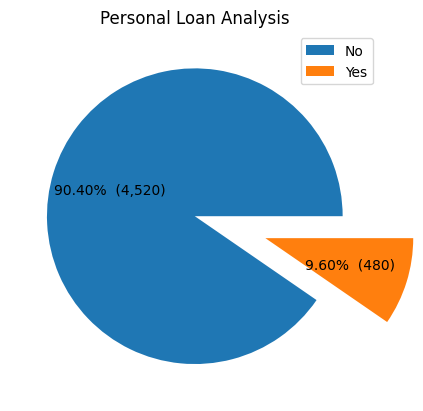

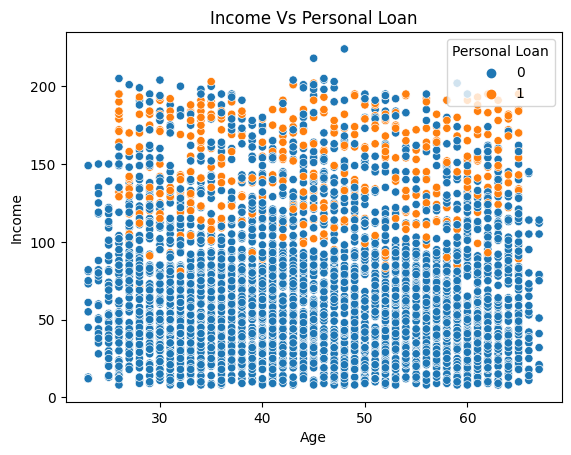

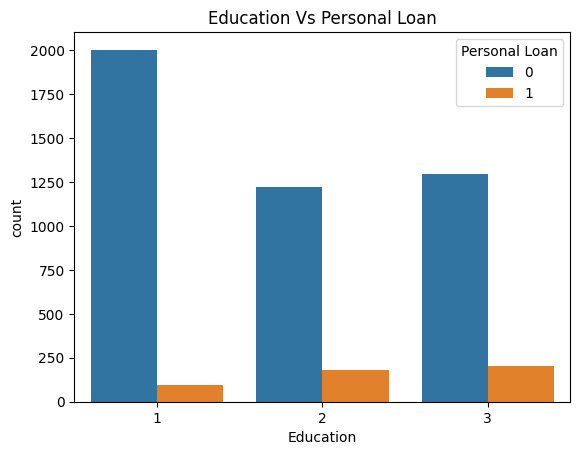

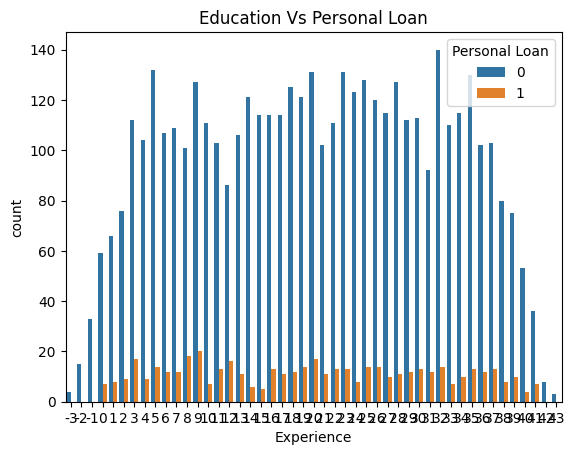

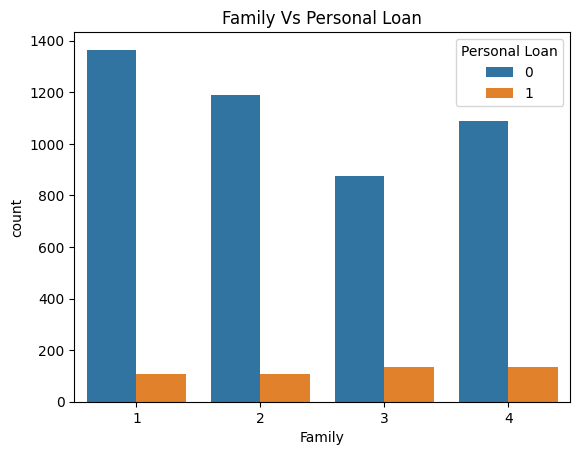

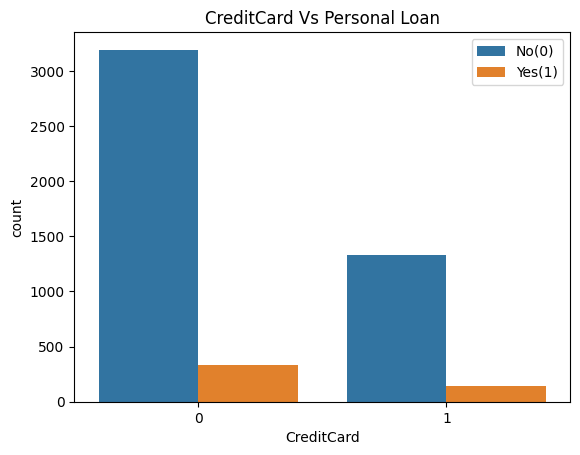

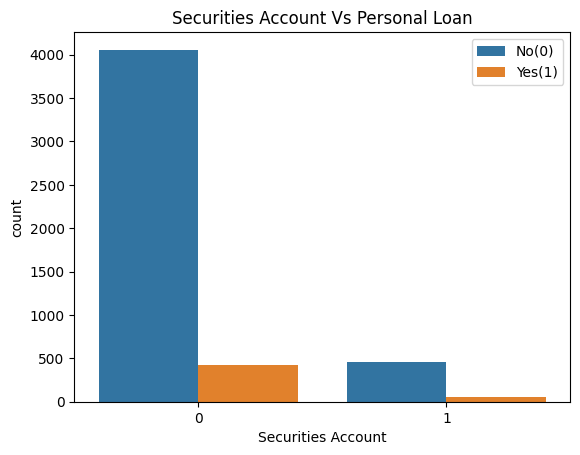

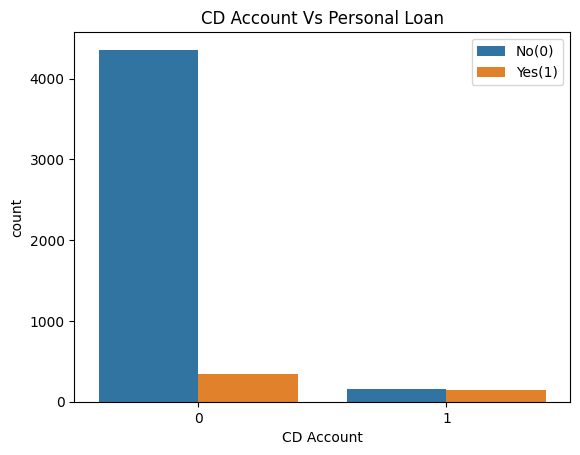

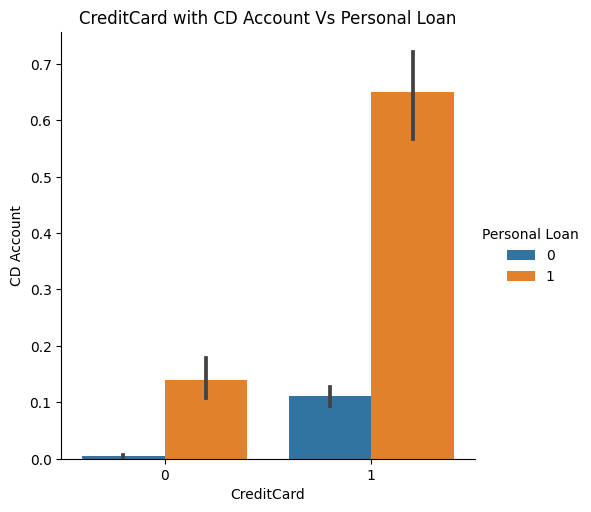

   Personal Loan  CreditCard  CD Account     0
0              0           0           0  3178
1              0           1           0  1180
2              0           1           1   147
3              0           0           1    15
4              1           0           0   290
5              1           1           1    93
6              1           1           0    50
7              1           0           1    47


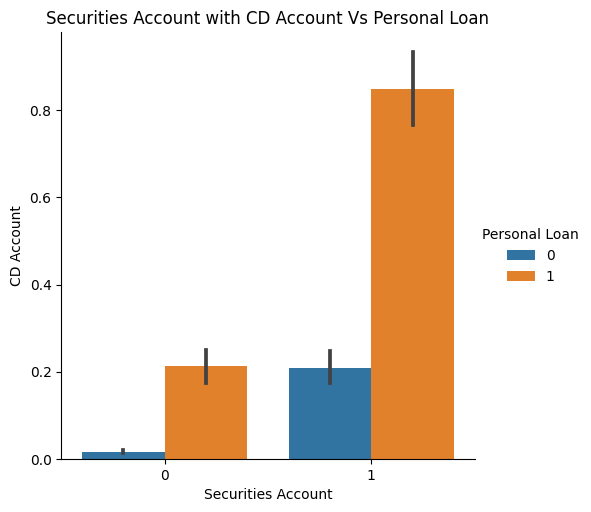

   Personal Loan  Securities Account  CD Account     0
0              0                   0           0  3992
1              0                   1           0   366
2              0                   1           1    96
3              0                   0           1    66
4              1                   0           0   331
5              1                   0           1    89
6              1                   1           1    51
7              1                   1           0     9


In [44]:
# Predictor Variable Analysis
data = df['Personal Loan'].apply(lambda x: 'Yes' if x==1 else 'No').value_counts()

# There is 9% Success rate in conversion to personal loan (Do Not Reject the null hypothesis)
# The distribution is skewed with the metric of 2.743607 (Right Skewed => Mode > Median > Mean)

# further analysis interms of availed personal loan (Yes=1) and not interested in not availed personal loan (No=0)
# where we have to explore in Depositer accounts which are meant to be potential customers
# There are far few records in class 1 i.e. people who took the personal loan last time. But that
# is the class of interst to us! We have to identify potential customers and do not want any potential
# customer to be missed.
loans = df.groupby(["Personal Loan"])
per = list(loans['Personal Loan'].value_counts().items())
print(
    f'No. of Availing Personal Loans : {per[1][1]} | {(per[1][1]/df.shape[0])*100}%')
print(
    f'No. of Not Availing Personal Loans : {per[0][1]} | {(per[0][1]/df.shape[0])*100}%')

# labels inside pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct, v=val)
    return my_autopct
# autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(values)/100))
# autopct='%.2f'

# method 1 : sns.countplot
# sns.countplot(data=data,x=data['Personal Loan'],hue='Personal Loan')

# method 2 : plt.pie
plt.pie(data, explode=[0, 0.5], autopct=lambda p: '{:.2f}%  ({:,.0f})'.format(p, p * sum(data)/100))
plt.legend(data.index)
plt.title('Personal Loan Analysis')
plt.show()

# figure of the plot
plt.figure()

# relationship with income 
sns.scatterplot(x='Age', y='Income', data=df, hue='Personal Loan')
plt.title('Income Vs Personal Loan')
plt.show()

# There is high chance of probability that customer is availing personal loan with greater than 80 or 90 Income

# relationship with education
sns.countplot(data=df,x='Education',hue='Personal Loan')
plt.title('Education Vs Personal Loan')
plt.show()

# there is high chance of probability that customer will avail personal loan whether he/she is literate

# relationship with experience
sns.countplot(data=df, x='Experience', hue='Personal Loan')
plt.title('Education Vs Personal Loan')
plt.show()

# there is high chance of probability that customer will avail personal loan whether he/she are less than 30 of there experience

# relationship with family
sns.countplot(data=df, x='Family', hue='Personal Loan')
plt.title('Family Vs Personal Loan')
plt.show()

# family with low member can have low chance of probability compare with high members in an family can avail with higher probability of chance

# relationship with CreditCard
sns.countplot(data=df,x='CreditCard',hue='Personal Loan')
plt.legend(['No(0)','Yes(1)'])
plt.title('CreditCard Vs Personal Loan')
plt.show()

# there is high chance of probability of availing personal loan having no Credit Card

# relationship with Securities Account
sns.countplot(data=df,x='Securities Account',hue='Personal Loan')
plt.legend(['No(0)', 'Yes(1)'])
plt.title('Securities Account Vs Personal Loan')
plt.show()

# there is high chance of probability of availing personal loan having no Securities Account

# relationship with CD Account
sns.countplot(data=df, x='CD Account', hue='Personal Loan')
plt.legend(['No(0)','Yes(1)'])
plt.title('CD Account Vs Personal Loan')
plt.show()

# there is high chance of probability of availing personal loan having no CD Account

# relationship with (CreditCard, CD Account)
sns.catplot(data=df, x='CreditCard', y='CD Account',
            kind='bar', hue='Personal Loan')
plt.title('CreditCard with CD Account Vs Personal Loan')
plt.show()

# metric
print(loans['CreditCard','CD Account'].value_counts().reset_index()) # Personal_Loan, CreditCard, CD_Account

# There is higher chance of probability in availing personal loan by having both CreditCard with CD Account compare with not having both

# relationship with (Securities Account, CD Account)
sns.catplot(data=df, x='Securities Account', y='CD Account',
            kind='bar', hue='Personal Loan')
plt.title('Securities Account with CD Account Vs Personal Loan')
plt.show()

# metric
print(loans['Securities Account', 'CD Account'].value_counts().reset_index()) # Personal_Loan, Securities_Account, CD_Account

# There is higher chance of probability in availing personal loan by having both Securities Account with CD Account compare with not having both

In [99]:
#========= Data Cleaning ==========#
# There are negative numbmers in experience! maybe typing error. 
# Convert to non-negative using .abs function
df['Experience'] = df['Experience'].abs()


# Drop insignificant or least useful or attribute which bias the model
# drop columns are ID, Zip Code
# df.set_index('ID',inplace=True)
df.drop(['ID','ZIP Code'],axis=1,inplace=True)

There are 169 plots in the below graph


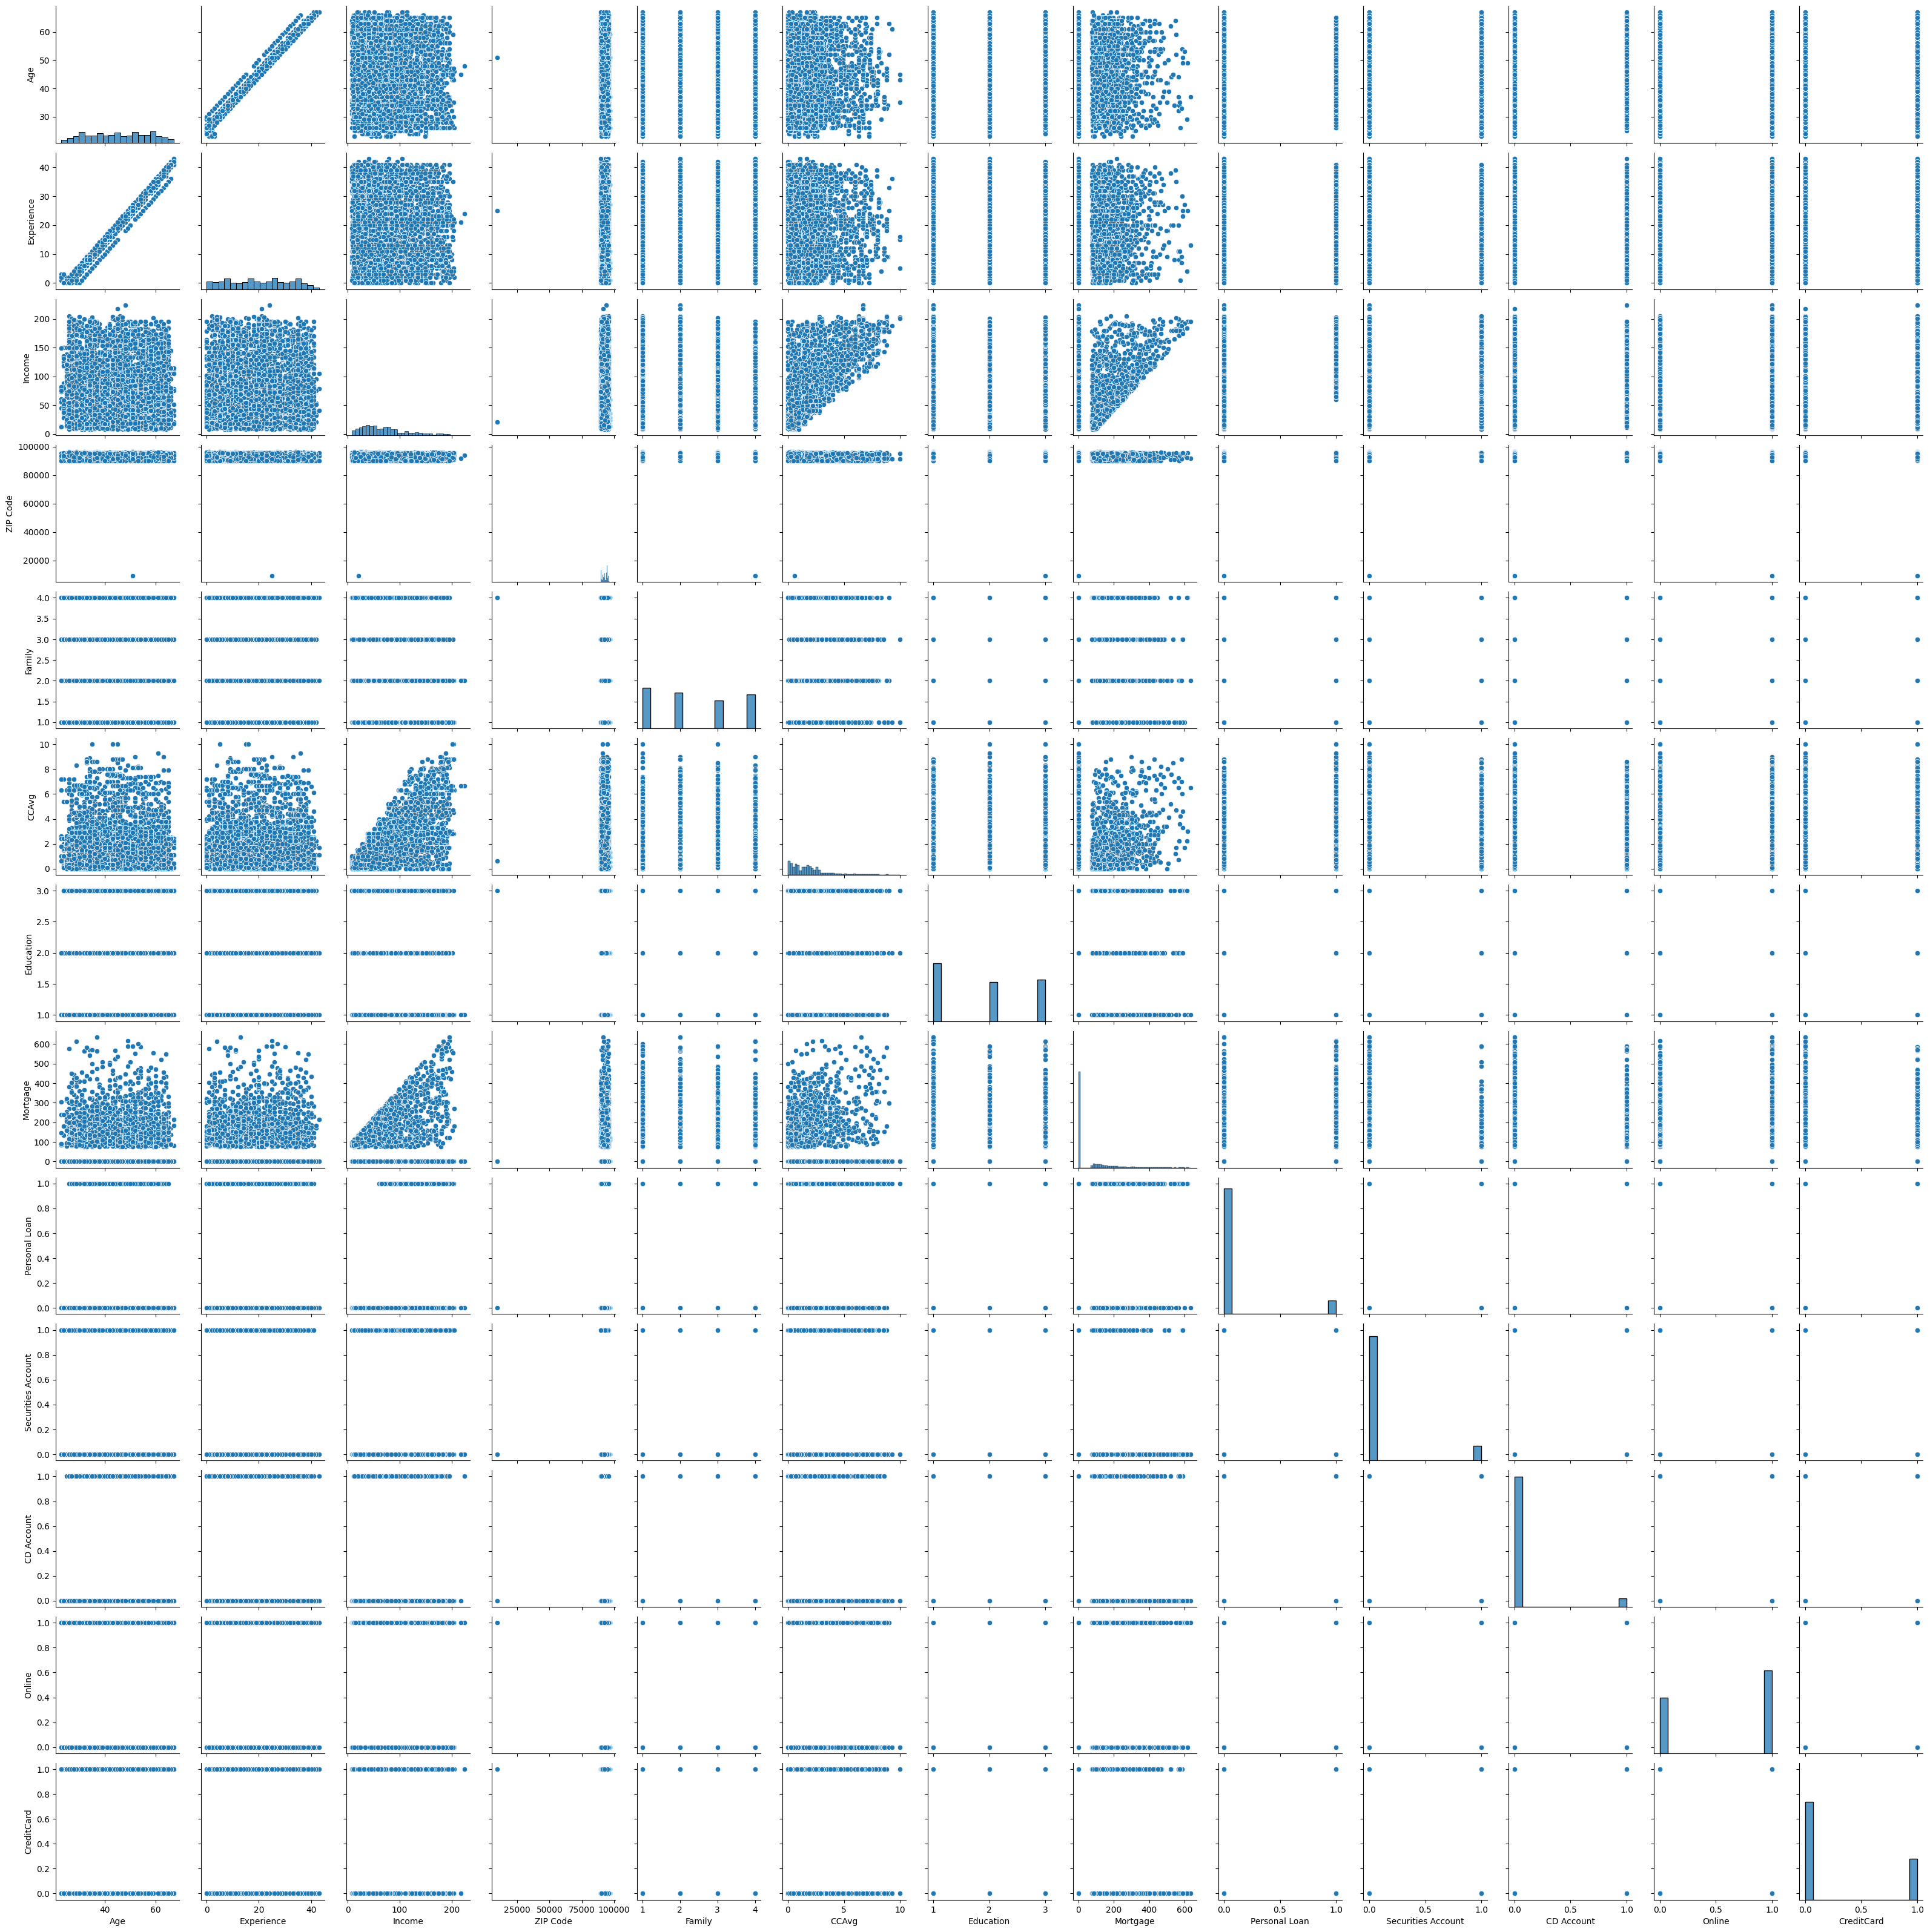

In [88]:
# for statistical plots, compare all attributes visually to check for relationships that can be exploited

# method 1: permutations
from itertools import permutations as pt


def scatterplot(x,y,k,*size):
    plt.subplot(*size,k)
    plt.scatter(df[x],df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    # plt.title(f'{x} vs {y}')

per = list(pt(df.columns,2)) # paring two features at a time
# print(f'There are {len(per)} plots left to plot.')

# plotting
ax = (39,4) # 156 = (13,12) | (39,4)


# fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
# fig.tight_layout()  # Or equivalently,  "plt.tight_layout()"

# for i,j in enumerate(per,start=1):
#     scatterplot(*j,i,*ax)
# plt.suptitle('Analysis')
# plt.show()


# method 2: seaborn.pairplot
print('There are 169 plots in the below graph') # 13 x 13
sns.pairplot(df) # 39.9s (max)

## Models

In [1]:
# Separate the independent attributes i.e. columns 0 to 8 and store them in X array
# Store the target column (column 8) into Y array
X = df.loc[:, df.columns != 'Personal Loan']
Y = df.loc[:, df.columns == 'Personal Loan']


NameError: name 'df' is not defined

In [ ]:
# Create the training and test data set in the ratio of 70:30 respectively. Can be any other ratio...
# Prepare data for logistic regression

features=X_df #.iloc[:, 0:10]
features_array = features.values   #logistic modeling algorithm requires feature array not dataframe
target_labels = y_df.values


test_size = 0.40 # taking 60:40 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code when using random functions to 
# generate the training and test data

X_train, X_test, y_train, y_test = model_selection.train_test_split(features_array, target_labels, test_size=test_size, random_state=seed)
y_train = np.ravel(y_train)   # to convert 1 d vector into 1 d array

# Logistic Regression

In [ ]:
# Let us first try logistic regression to predict the personal loan affinity - 
# We removed the binned columns for this (considered only 11 columns 1:10) which are numeric

model = LogisticRegression()
model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)
y_predict = model.predict(X_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))


In [ ]:
# The accuracy score of .954 looks impressive but do not forget, it is unreliable as it is a score at
# model level. Let us look at class level, especially the class 1.

# summarize the fit of the model
print(metrics.classification_report(y_test, y_predict))

In [ ]:
#The precision and recall for class 1 is low...

#Precision: Within a given set of positively-labeled results, the fraction that were 
#true positives = tp/(tp + fp) , this has to be calculated for each class i.e. 0 and 1 and should be
# high for the class less represented, class 1 in our example

#Recall: Given a set of positively-labeled results, the fraction of all positives that were 
#retrieved = tp/(tp + fn)

# Accuracy: tp + tn / (tp + tn + fp +fn) But this measure can be dominated by larger class. 
# Suppose 10, 90 and 80 of 90 is correctly predicted while only 2 of 0 is predicted correctly. 
# Accuracy is 80+2 / 100 i.e. 82%

# F is harmonic mean of precision and recal given by ((B^2 +1) PR) / (B^2P +R)
#When B is set to 1 we get F1 = 2PR / (P+R)

# K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
NNH.fit(X_train, y_train)

In [ ]:
predicted_labels = NNH.predict(X_test)

In [ ]:
print(metrics.confusion_matrix(y_test, predicted_labels))

In [ ]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

In [ ]:
### Recall (true positives / (true positives + false negatives)) for class 1 is the least. That is 
### because majority of data points belong to class 0 and in KNN, probability of finding data points
### from class 0 closer to a test point than a data point from class 1 is high.

In [ ]:
### let us check the effect of scaling (convert all dimensions to z scores)
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
NNH.fit(X_train_scaled, y_train)

In [ ]:
predicted_labels = NNH.predict(X_test_scaled)

In [ ]:
print(metrics.confusion_matrix(y_test, predicted_labels))

In [ ]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

In [ ]:
## scaled KNN algorithm gives the best result for class 1 till now. Let us check decision tree

# Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df, y_df, test_size=test_size, random_state=seed)

In [ ]:
dt_model.fit(X_train, y_train)

In [ ]:
from sklearn import tree

train_char_label = ['0', '1']
Bank_Tree_File = open('D:\Bank_tree.dot','w')
dot1_data = tree.export_graphviz(dt_model, out_file=Bank_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Bank_Tree_File.close()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'max_depth': [7, 8, 9, 10],
    'min_samples_leaf': [15, 20, 25],
    'min_samples_split': [45, 60, 75]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_train,ytrain_predict))

In [ ]:
print(classification_report(y_test,ytest_predict))

# Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 8],
    'max_features': [11, 12, 13],
    'min_samples_leaf': [20, 25],
    'min_samples_split': [60, 75],
    'n_estimators': [101, 301]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [ ]:
print(classification_report(y_train,ytrain_predict))

In [ ]:
print(classification_report(y_test,ytest_predict))